If any packages missing do. 
- !pip install (missing package)


In [1]:
import string

from collections import Counter

import matplotlib.pyplot as plt

from nltk.corpus import stopwords

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.stem import WordNetLemmatizer

from nltk.tokenize import word_tokenize

import nltk
#nltk.download('vader_lexicon')
import warnings
warnings.filterwarnings('ignore')

In [2]:
#text = open('read.txt', 'r',encoding='utf-8')

text = open('read.txt', encoding="utf-8").read()

lower_case = text.lower()

# str.maketrans removes any punctuations 

cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

# Using word_tokenize to tokenize sentence into words

tokenized_words = word_tokenize(cleaned_text, "english")


In [3]:
# Removing Stop Words
final_words = []

for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)

In [4]:
# Lemmatization - From plural to single + Base form of a word (example better-> good)

lemma_words = []

for word in final_words:
    word = WordNetLemmatizer().lemmatize(word)
    lemma_words.append(word)

In [5]:
emotion_list = []

with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')

        if word in lemma_words:
            emotion_list.append(emotion)
            
print("People emotions from the text \n", emotion_list, '\n \n')


w = Counter(emotion_list)
print("Count of each emotion \n", w)

People emotions from the text 
 [' happy', ' happy', ' attached', ' happy', ' attracted', ' alone', ' free', ' hated', ' happy', ' entitled', ' happy', ' loved', ' hated', ' entitled'] 
 

Count of each emotion 
 Counter({' happy': 5, ' hated': 2, ' entitled': 2, ' attached': 1, ' attracted': 1, ' alone': 1, ' free': 1, ' loved': 1})


#### VADER

 VADER ( Valence Aware Dictionary for Sentiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. It is available in the NLTK package and can be applied directly to unlabeled text data.
VADER sentimental analysis relies on a dictionary that maps lexical features to emotion intensities known as sentiment scores. The sentiment score of a text can be obtained by summing up the intensity of each word in the text.
For example- Words like ‘love’, ‘enjoy’, ‘happy’, ‘like’ all convey a positive sentiment. Also VADER is intelligent enough to understand the basic context of these words, such as “did not love” as a negative statement. It also understands the emphasis of capitalization and punctuation, such as “ENJOY”

#### Polarity classification
We won’t try to determine if a sentence is objective or subjective, fact or opinion. Rather, we care only if the text expresses a positive, negative or neutral opinion.

In [6]:
# Test how SentimentIntensityAnalyzer works
sia = SentimentIntensityAnalyzer()

test_sent = 'Corona is bad virus and killed many people'
#sent = "House of cards is a awesome series, one of my best Series" 

print (sia.polarity_scores(test_sent))

{'neg': 0.571, 'neu': 0.429, 'pos': 0.0, 'compound': -0.8402}


In [7]:
def sentiment_analyse(sentiment_text):
    
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    
    if score['neg'] > score['pos']:
        print("\n     ******Negative Sentiment*******")
        
    elif score['neg'] < score['pos']:
        print("\n     ******Positive Sentiment*******")
    else:
        print("Neutral Sentiment")


     ******Positive Sentiment*******


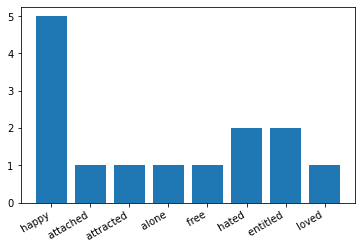

In [8]:
sentiment_analyse(cleaned_text)

fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()